# EJERCICIOS

In [56]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd

## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [57]:
cifar10 = tf.keras.datasets.cifar10.load_data()

In [58]:
print(cifar10[1])

(array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
       

In [59]:
# Dividimos las tuplas en x e y
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10

# Usar 50,000 imágenes para entrenamiento
x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

# Dividir las 10,000 imágenes de prueba en 5,000 para validación y 5,000 para prueba
x_val = x_test_full[:5000]
y_val = y_test_full[:5000]

x_test = x_test_full[5000:10000]
y_test = y_test_full[5000:10000]

# Verificar las formas
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de x_test:", x_test.shape)
print("Forma de y_test:", y_test.shape) 

Forma de x_train: (50000, 32, 32, 3)
Forma de y_train: (50000, 1)
Forma de x_val: (5000, 32, 32, 3)
Forma de y_val: (5000, 1)
Forma de x_test: (5000, 32, 32, 3)
Forma de y_test: (5000, 1)


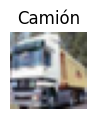

In [60]:
# DDiccionario de categorias para traducir las etiquetas
def get_category_name(label):
    categories = {
        0: "Avión",
        1: "Automóvil",
        2: "Pájaro",
        3: "Gato",
        4: "Ciervo",
        5: "Perro",
        6: "Rana",
        7: "Caballo",
        8: "Barco",
        9: "Camión"
    }
    return categories.get(label, "ERROR")

def display_image(data,tag=""):
    plt.figure(figsize=(2, 1)) 
    plt.axis('off')
    plt.imshow(data)
    if tag !="":
        plt.title(get_category_name(tag))
    plt.show()

display_image(x_train[1],y_train[1][0])

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [61]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(32,32,3)))

# Flatten
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [ ]:
learning_rates = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
results = []

for lr in learning_rates:

    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['sparse_categorical_accuracy'])

    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
    end_time = time.time()

    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time

    results.append({
        'Red neuronal normal': {
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        }
    })

# Imprimir resultados
for result in results:
    print(result)


Epoch 1/5


### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [ ]:
best_lr = 1e-7
results.clear
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=5,
    restore_best_weights=True 
)

start_time = time.time()
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), 
                    callbacks=[early_stopping_callback], verbose=1)
end_time = time.time()

train_accuracy = model.evaluate(x_train, y_train, verbose=0)[1] 
val_accuracy = model.evaluate(x_val, y_val, verbose=0)[1]
total_time = end_time - start_time

if early_stopping_callback.stopped_epoch == 5:
    best_epoch = 1 
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

results.append({
    'Red neuronal normal con detención temprana': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

for result in results:
    print(result)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.5631 - sparse_categorical_accuracy: 0.4366 - val_loss: 1.5916 - val_sparse_categorical_accuracy: 0.4362
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.5696 - sparse_categorical_accuracy: 0.4368 - val_loss: 1.5914 - val_sparse_categorical_accuracy: 0.4368
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5689 - sparse_categorical_accuracy: 0.4343 - val_loss: 1.5913 - val_sparse_categorical_accuracy: 0.4352
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5622 - sparse_categorical_accuracy: 0.4377 - val_loss: 1.5913 - val_sparse_categorical_accuracy: 0.4354
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5584 - sparse_categorical_accuracy: 0.4400 - val_loss: 1.5912 - val_sparse_categorical_accuracy: 0.4360
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5661 - sparse_categorical_accuracy: 0.4373 - val_loss: 1.5911 - val_sparse_categorical_accu

AttributeError: 'dict' object has no attribute 'append'

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.